<a href="https://colab.research.google.com/github/gbickenbach/Demand_AdvancedTransit/blob/main/OsmnxNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install osmnx

In [ ]:
import networkx as nx
import pandas as pd
import osmnx as ox

In [ ]:
from shapely.geometry import Point, Polygon
#Define polygon of place
coordsMiddlebury = [[-73.188508, 44.0397786], [-73.1843814, 43.9971204], [-73.1558923, 43.9832344], [-73.1303148, 43.9973138], [-73.1440477, 44.0419998], [-73.188508, 44.0397786]]
polyMid = Polygon(coordsMiddlebury)

G = ox.graph_from_polygon(polyMid, network_type='drive') # simplify=False
nodes_list = list(G.nodes)
ox.plot_graph(G)

In [ ]:
nodes_list

In [ ]:
#Import Data
#Import stations of transit line and lodes data
data = pd.read_csv('drive/MyDrive/FYREE/Part Four/data.csv')
stations = pd.read_csv('drive/MyDrive/FYREE/Spring/stations.csv')
data = data.drop(columns="Unnamed: 0")

In [ ]:
#Import Data
data = pd.read_csv('drive/MyDrive/FYREE/Part Four/data.csv')
stations = pd.read_csv('drive/MyDrive/FYREE/Spring/stations.csv')
data = data.drop(columns="Unnamed: 0")

#Only do this if the objective is to separate by lines. Dataset should have a column with each line and corresponding binary values
line = input("Enter desired line")
if line == "Blue Line":
  colm = 3
elif line == "Brown Line":
  colm = 4
elif line == "Green Line":
  colm = 5
elif line == "Orange Line":
  colm = 6
elif line == "Purple Line":
  colm = 7
colm += 1
for i, stat in enumerate(stations.iloc[:, colm]):
  if(stat == 0):
    stations = stations.drop(i)
stations


Enter desired lineOrange Line


,Station,Total,Lat,Lon,Blue Line,Brown Line,Green Line,Orange Line,Purple Line
0,Academy Street,NaN,44.010821,-73.171586,1,1,1,1,1
1,Briarwood,NaN,44.014080,-73.156262,0,0,0,1,0
3,Cannon Park,NaN,44.012619,-73.169394,0,0,0,1,0
6,Commons,NaN,44.013344,-73.159748,0,0,0,1,0
11,Middlebury Rec Park,NaN,44.012838,-73.159869,0,0,0,1,0
14,Peterson Terrace,NaN,44.020520,-73.152177,0,0,0,1,0
16,Shaws,NaN,44.014664,-73.163711,0,0,0,1,0
17,Washington St/Court Sq,NaN,44.014408,-73.165588,0,0,0,1,0


In [ ]:
import matplotlib.pyplot as plt

results = stations
results['Count'] = 0
all_alloc=[]
a = 0
sum = 0
threshold = 300
uns = pd.DataFrame()

choice = input("Home or work?")

if (choice == 'work' or choice == 'Work'):
  c1 = 13
  c2 = 14
elif (choice =='home' or choice == 'Home'):
  c1 = 15
  c2 = 16
else:
  print("Invalid, setting default to home")
  c1 = 15
  c2 = 16


#For every lodes data unit, find nearest station and aggregate towards that staion. If distance > threshold, data point wont be aggregated
#These points will be added to uns dataset and used for optional stop locations
for i, row in enumerate(data.iloc[:, c1]):
  for j, fila in enumerate(stations.iloc[:, 2]):
    orig = ox.distance.nearest_nodes(G, data.iloc[i, c2], data.iloc[i, c1])
    dest = ox.distance.nearest_nodes(G, stations.iloc[j, 3], stations.iloc[j, 2])
    route = nx.shortest_path_length(G,  source=orig, target=dest, weight='length')
    if (j == 0):
      name = stations.iloc[0, 0]
      count = route
    if(route < count):
      orig_i = orig
      dest_i = dest
      count = route
      name = stations.iloc[j, 0]
  for k, row in enumerate(results.iloc[:, 0]):
    if (row == name):
      #print(count)
      if(count < threshold):
        sum = sum + count
        a += 1
        results.iloc[k, 4] = results.iloc[k, 4] + 2
        print(name, i)
        rote = nx.shortest_path(G, orig_i, orig_i, weight="length")
        all_alloc.append(rote)
      else:
        uns = pd.concat([uns, data.iloc[i].to_frame().T], ignore_index=True)


Enter First Column Number (15 for home, 13 for work)15
Enter Second Column Number (16 for home, 14 for work)16
Middlebury Rec Park 2
Commons 3
Commons 18
Commons 22
Academy Street 25
Cannon Park 26
Commons 33
Shaws 34
Briarwood 36
Peterson Terrace 46
Commons 52
Shaws 53
Middlebury Rec Park 54
Commons 63
Commons 66
Commons 69
Peterson Terrace 79
Commons 82
Washington St/Court Sq 89
Cannon Park 99
Academy Street 107
Commons 108
Commons 113
Cannon Park 122
Academy Street 123
Commons 129
Washington St/Court Sq 130
Peterson Terrace 135
Commons 138
Shaws 139
Middlebury Rec Park 144
Briarwood 145
Washington St/Court Sq 153
Commons 168
Middlebury Rec Park 174
Academy Street 184
Cannon Park 185
Commons 195
Middlebury Rec Park 206
Commons 210
Cannon Park 217
Commons 223
Peterson Terrace 239
Commons 251
Shaws 252
Briarwood 256
Washington St/Court Sq 260
Middlebury Rec Park 274
Commons 275
Shaws 276
Cannon Park 285
Academy Street 286
Cannon Park 287
Commons 296
Middlebury Rec Park 299
Academy Stre

In [ ]:
demcov = str(round(((a/309)*100), 2))
print("Percentage of demand covered: " + demcov + "%")
str1 = "Percentage of demand covered: " + demcov + "%"
mwd = str(round((sum/a), 2))
str2 = "Mean Walking Distance: " + mwd + " meters"
print("Mean Walking Distance: " + mwd + " meters")


Percentage of demand covered: 19.09%
Mean Walking Distance: 113.05 meters


In [ ]:
all_alloc

In [ ]:
#Plot all unattended demand points
import matplotlib.pyplot as plt
all_miss = []
all_stats = []

for i, row in enumerate(uns.iloc[:-1, 0]):
   orig = ox.distance.nearest_nodes(G, uns.iloc[i, c2], uns.iloc[i, c1])
   dest = ox.distance.nearest_nodes(G, uns.iloc[i, c2], uns.iloc[i, c1])
   rote = nx.shortest_path(G, orig, dest, weight="length")
   all_miss.append(rote)

for j, row in enumerate(stations.iloc[:, 0]):

  origi = ox.distance.nearest_nodes(G, stations.iloc[j, 3], stations.iloc[j, 2])
  desti = ox.distance.nearest_nodes(G, stations.iloc[j, 3], stations.iloc[j, 2])
  rote = nx.shortest_path(G, origi, desti, weight="length")
  all_stats.append(rote)

all_alloc = [x for x in all_alloc if x not in all_miss]
#bbox = ox.utils_geo.bbox_from_point((44.013924, -73.167247), dist=1000, project_utm=True)
fig, ax = ox.plot_graph(G, node_size=0, bgcolor='w', show=False)


# Plot all_miss in red
for route in all_miss:
    ox.plot_graph_route(G, route, route_linewidth=6, bgcolor='w', show=False, route_color='r', orig_dest_size=15, ax=ax)

# Plot all_stats in green
for route in all_stats:
    ox.plot_graph_route(G, route, route_linewidth=6, bgcolor='w', show=False, route_color='g', orig_dest_size=40, ax=ax)

# Plot all_alloc in blue
for route in all_alloc:
    ox.plot_graph_route(G, route, route_linewidth=6, bgcolor='w', show=False, route_color='b', orig_dest_size=8, ax=ax)

legend_entries = [
  plt.Line2D([0], [0], color='r', lw=3, label='Unattended Demand'),
  plt.Line2D([0], [0], color='g', lw=3, label='Station Locations'),
  plt.Line2D([0], [0], color='b', lw=3, label='Allocated Demand')
]

# Add legend
ax.legend(handles=legend_entries)

ax.text(0.9, 0.18, str1, transform=ax.transAxes,
        fontsize=8, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.9, 0.13, str2, transform=ax.transAxes,
        fontsize=8, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5))
fig

In [ ]:
ops = pd.read_csv('drive/MyDrive/FYREE/Part Four/optional.csv')
r2 = ops
r2['Count'] = 0
new_alloc=[]
threshold = 300
defno = pd.DataFrame()

#For every lodes data unit, find nearest station and aggregate towards that staion. If distance > threshold, data point wont be aggregated
#These points will be added to uns dataset and used for optional stop locations
for i, row in enumerate(uns.iloc[:, c1]):
  for j, fila in enumerate(ops.iloc[:, 2]):
    orig = ox.distance.nearest_nodes(G, uns.iloc[i, c2], uns.iloc[i, c1])
    dest = ox.distance.nearest_nodes(G, ops.iloc[j, 3], ops.iloc[j, 2])
    route = nx.shortest_path_length(G,  source=orig, target=dest, weight='length')
    if (j == 0):
      name = ops.iloc[0, 0]
      count = route
    if(route < count):
      orig_i = orig
      dest_i = dest
      count = route
      name = ops.iloc[j, 0]
  for k, row in enumerate(r2.iloc[:, 0]):
    if (row == name):
      #print(count)
      if(count < threshold):
        sum = sum + count
        a += 1
        r2.iloc[k, 4] = r2.iloc[k, 4] + 2
        print(name, i)
        rote = nx.shortest_path(G, orig_i, orig_i, weight="length")
        new_alloc.append(rote)
      else:
        defno = pd.concat([defno, uns.iloc[i].to_frame().T], ignore_index=True)


Buttolph Acres 1
Opposite Dunkin Donuts 3
Pharmacy 5
Pharmacy 11
Opposite Dunkin Donuts 19
Opposite Dunkin Donuts 33
Gorham Lane 35
College @ Arts 39
Buttolph Acres 44
Opposite Dunkin Donuts 46
Opposite Dunkin Donuts 48
Opposite Dunkin Donuts 68
Buttolph Acres 69
Pharmacy 71
Opposite Dunkin Donuts 73
Gorham Lane 74
Opposite Dunkin Donuts 80
Opposite Dunkin Donuts 86
Buttolph Acres 93
Gorham Lane 97
Opposite Dunkin Donuts 100
Opposite Dunkin Donuts 103
Opposite Dunkin Donuts 113
Opposite Dunkin Donuts 114
Buttolph Acres 115
Buttolph Acres 116
Pharmacy 119
Opposite Dunkin Donuts 124
Opposite Dunkin Donuts 138
Opposite Dunkin Donuts 139
Buttolph Acres 140
Buttolph Acres 142
Gorham Lane 148
Gorham Lane 149
Opposite Dunkin Donuts 159
Buttolph Acres 160
Pharmacy 161
Pharmacy 162
Gorham Lane 163
Buttolph Acres 167
Creekside 171
Pharmacy 173
Opposite Dunkin Donuts 181
Opposite Dunkin Donuts 190
Buttolph Acres 191
Opposite Dunkin Donuts 197
Opposite Dunkin Donuts 206
Buttolph Acres 207
Pharmacy

In [ ]:
demcov = str(round(((a/309)*100), 2))
print("New percentage of demand covered: " + demcov + "%")
str3 = "New percentage of demand covered: " + demcov + "%"
mwd = str(round((sum/a), 2))
str4 = "New mean Walking Distance: " + mwd + " meters"
print("New mean Walking Distance: " + mwd + " meters")

New percentage of demand covered: 35.92%
New mean Walking Distance: 109.98 meters


In [ ]:
defno

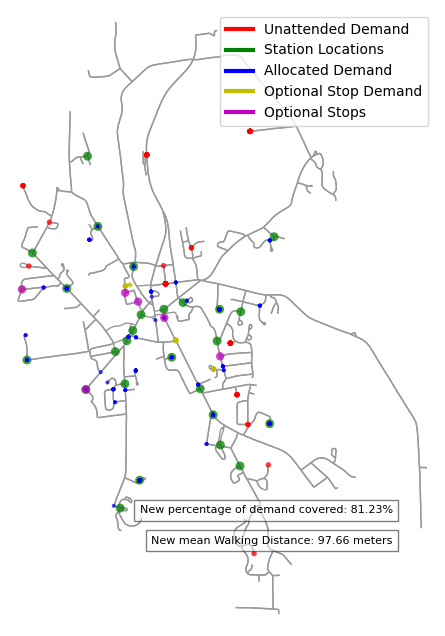

In [ ]:
#Plot all unattended demand points
import matplotlib.pyplot as plt
all_miss = []
all_stats = []
new_stats = []

for i, row in enumerate(defno.iloc[:-1, 0]):
   orig = ox.distance.nearest_nodes(G, defno.iloc[i, c2], defno.iloc[i, c1])
   dest = ox.distance.nearest_nodes(G, defno.iloc[i, c2], defno.iloc[i, c1])
   rote = nx.shortest_path(G, orig, dest, weight="length")
   all_miss.append(rote)

for j, row in enumerate(stations.iloc[:, 0]):

  origi = ox.distance.nearest_nodes(G, stations.iloc[j, 3], stations.iloc[j, 2])
  desti = ox.distance.nearest_nodes(G, stations.iloc[j, 3], stations.iloc[j, 2])
  rote = nx.shortest_path(G, origi, desti, weight="length")
  all_stats.append(rote)

for j, row in enumerate(ops.iloc[:, 0]):

  origi = ox.distance.nearest_nodes(G, ops.iloc[j, 3], ops.iloc[j, 2])
  desti = ox.distance.nearest_nodes(G, ops.iloc[j, 3], ops.iloc[j, 2])
  rate = nx.shortest_path(G, origi, desti, weight="length")
  new_stats.append(rate)

#bbox = ox.utils_geo.bbox_from_point((44.013924, -73.167247), dist=1000, project_utm=True)
fig, ax = ox.plot_graph(G, node_size=0, bgcolor='w', show=False)


# Plot all_miss in red
for route in all_miss:
    ox.plot_graph_route(G, route, route_linewidth=6, bgcolor='w', show=False, route_color='r', orig_dest_size=15, ax=ax)

# Plot all_stats in green
for route in all_stats:
    ox.plot_graph_route(G, route, route_linewidth=6, bgcolor='w', show=False, route_color='g', orig_dest_size=40, ax=ax)

# Plot all_alloc in blue
for route in all_alloc:
    ox.plot_graph_route(G, route, route_linewidth=6, bgcolor='w', show=False, route_color='b', orig_dest_size=8, ax=ax)

# Plot new_alloc in orange
for route in new_alloc:
    ox.plot_graph_route(G, route, route_linewidth=6, bgcolor='w', show=False, route_color='y', orig_dest_size=13, ax=ax)

# Plot new_stats in magenta
for route in new_stats:
    ox.plot_graph_route(G, route, route_linewidth=6, bgcolor='w', show=False, route_color='m', orig_dest_size=35, ax=ax)

legend_entries = [
  plt.Line2D([0], [0], color='r', lw=3, label='Unattended Demand'),
  plt.Line2D([0], [0], color='g', lw=3, label='Station Locations'),
  plt.Line2D([0], [0], color='b', lw=3, label='Allocated Demand'),
  plt.Line2D([0], [0], color='y', lw=3, label='Optional Stop Demand'),
  plt.Line2D([0], [0], color='m', lw=3, label='Optional Stops')
]

# Add legend
ax.legend(handles=legend_entries)

ax.text(0.9, 0.18, str3, transform=ax.transAxes,
        fontsize=8, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5))
ax.text(0.9, 0.13, str4, transform=ax.transAxes,
        fontsize=8, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5))
fig